**Question 1**

In [ ]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Load the dataset
df = pd.read_csv("manhattan_voter_data.tsv", sep="\t")

# Rename the column for consistency
df.rename(columns={"time_spent_on_snapface": "seconds_spent_on_snapface"}, inplace=True)

# Display basic summary statistics
print("Summary Statistics:\n")
print(df.describe())

Summary Statistics:

       voted_purple  seconds_spent_on_snapface      blackout         income
count  10000.000000               10000.000000  10000.000000   10000.000000
mean       0.453700                  95.007293      0.400000  186195.254082
std        0.497877                  60.408167      0.489922  235384.806156
min        0.000000                   0.000000      0.000000   37835.221207
25%        0.000000                  46.344485      0.000000   52701.248185
50%        0.000000                  95.424231      0.000000   57118.068040
75%        1.000000                 139.791834      1.000000   67443.597903
max        1.000000                 300.000000      1.000000  920474.901155


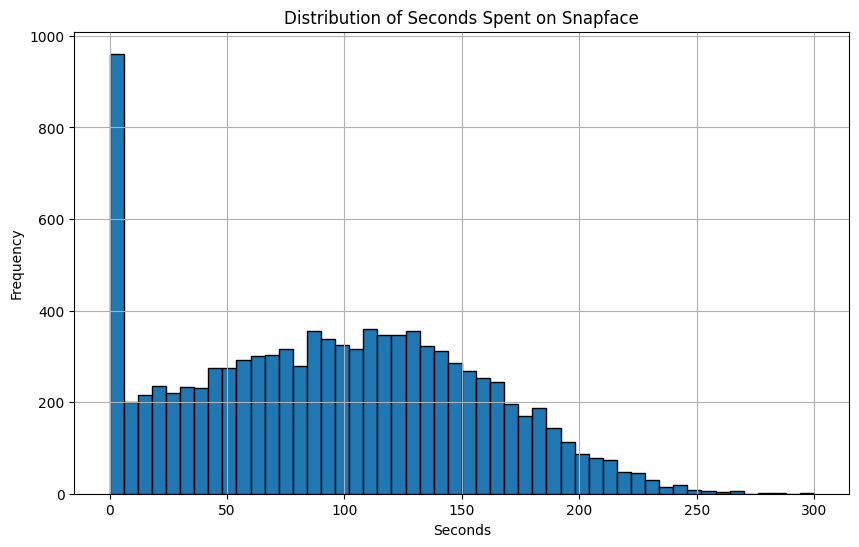

In [ ]:
# --- Visualizations ---

# 1. Snapface usage
plt.figure(figsize=(10, 6))
plt.hist(df["seconds_spent_on_snapface"], bins=50, edgecolor='black')
plt.title("Distribution of Seconds Spent on Snapface")
plt.xlabel("Seconds")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

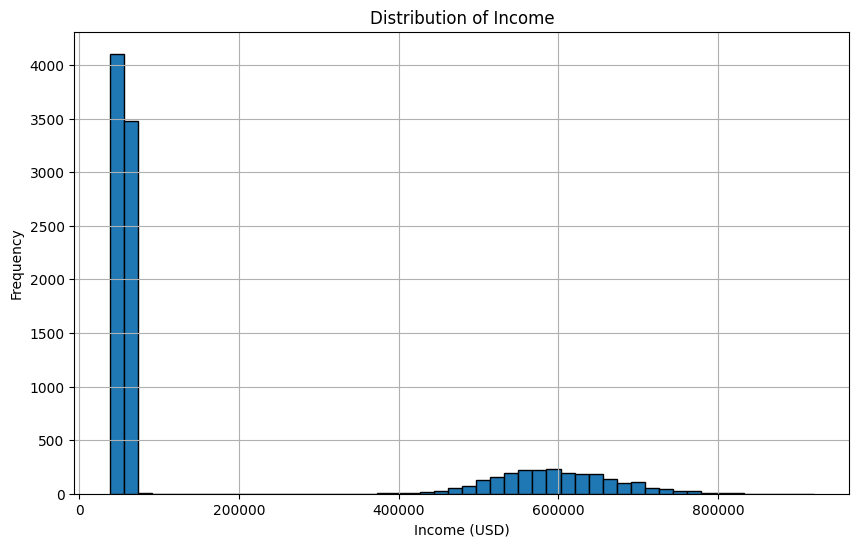

In [ ]:
# 2. Income distribution
plt.figure(figsize=(10, 6))
plt.hist(df["income"], bins=50, edgecolor='black')
plt.title("Distribution of Income")
plt.xlabel("Income (USD)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

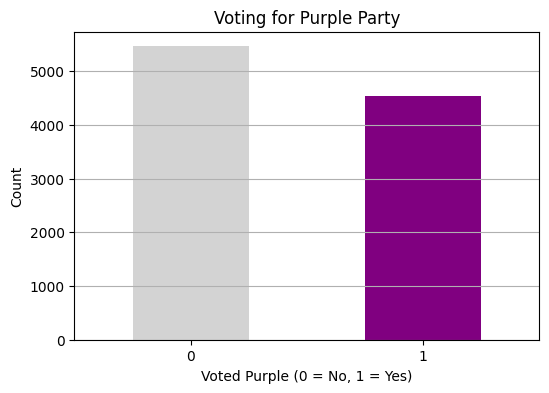

In [ ]:
# 3. Voting for Purple Party
plt.figure(figsize=(6, 4))
df["voted_purple"].value_counts().sort_index().plot(kind="bar", color=["lightgray", "purple"])
plt.title("Voting for Purple Party")
plt.xlabel("Voted Purple (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

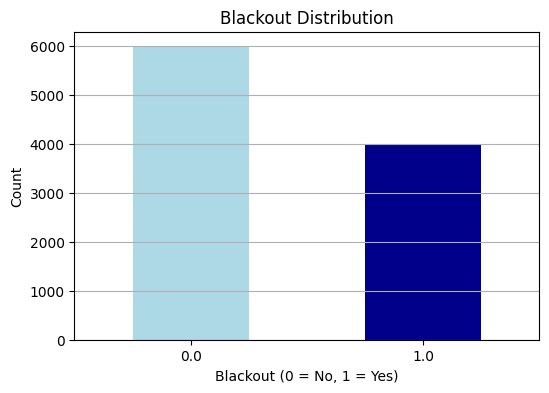

In [ ]:
# 4. Blackout Indicator
plt.figure(figsize=(6, 4))
df["blackout"].value_counts().sort_index().plot(kind="bar", color=["lightblue", "darkblue"])
plt.title("Blackout Distribution")
plt.xlabel("Blackout (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

**Question 2**

In [ ]:
# First-stage regression:
# Regress Snapface usage on blackout and income
first_stage_model = smf.ols(
    formula="seconds_spent_on_snapface ~ blackout + income", data=df
).fit()

# Print the summary of the first-stage regression
print(first_stage_model.summary())

# Specifically report the coefficient and p-value for the instrument
coef = first_stage_model.params["blackout"]
pval = first_stage_model.pvalues["blackout"]
print(f"\nCoefficient on blackout: {coef:.4f}")
print(f"P-value: {pval:.4f}")

                                OLS Regression Results                               
Dep. Variable:     seconds_spent_on_snapface   R-squared:                       0.518
Model:                                   OLS   Adj. R-squared:                  0.518
Method:                        Least Squares   F-statistic:                     5365.
Date:                       Sat, 29 Mar 2025   Prob (F-statistic):               0.00
Time:                               15:55:45   Log-Likelihood:                -51554.
No. Observations:                      10000   AIC:                         1.031e+05
Df Residuals:                           9997   BIC:                         1.031e+05
Df Model:                                  2                                         
Covariance Type:                   nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------

**Question 3**

In [ ]:
# Get the predicted values of Snapface usage from the first stage
df["snapface_hat"] = first_stage_model.fittedvalues

# Second-stage regression:
# Regress voting behavior on predicted Snapface usage and income
second_stage_model = smf.ols(
    formula="voted_purple ~ snapface_hat + income", data=df
).fit()

# Print the summary
print(second_stage_model.summary())

# Report and interpret the coefficient
coef_2sls = second_stage_model.params["snapface_hat"]
pval_2sls = second_stage_model.pvalues["snapface_hat"]

print(f"\n2SLS Coefficient on predicted Snapface usage: {coef_2sls:.4f}")
print(f"P-value: {pval_2sls:.4f}")

if pval_2sls < 0.05:
    print("Interpretation: The coefficient is statistically significant at the 5% level.")
else:
    print("Interpretation: The coefficient is NOT statistically significant at the 5% level.")


                            OLS Regression Results                            
Dep. Variable:           voted_purple   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     8.849
Date:                Sat, 29 Mar 2025   Prob (F-statistic):           0.000145
Time:                        15:55:51   Log-Likelihood:                -7206.0
No. Observations:               10000   AIC:                         1.442e+04
Df Residuals:                    9997   BIC:                         1.444e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.4618      0.012     38.551   

**Question 4**

In [ ]:
# First-stage regression:
# Regress Snapface usage on blackout and income
first_stage_model = smf.ols(
    formula="seconds_spent_on_snapface ~ blackout + income", data=df
).fit()

# Print the summary of the first-stage regression
print(first_stage_model.summary())

# Specifically report the coefficient and p-value for the instrument
coef = first_stage_model.params["blackout"]
pval = first_stage_model.pvalues["blackout"]
print(f"\nCoefficient on blackout: {coef:.4f}")
print(f"P-value: {pval:.4f}")


                                OLS Regression Results                               
Dep. Variable:     seconds_spent_on_snapface   R-squared:                       0.518
Model:                                   OLS   Adj. R-squared:                  0.518
Method:                        Least Squares   F-statistic:                     5365.
Date:                       Sat, 29 Mar 2025   Prob (F-statistic):               0.00
Time:                               15:55:56   Log-Likelihood:                -51554.
No. Observations:                      10000   AIC:                         1.031e+05
Df Residuals:                           9997   BIC:                         1.031e+05
Df Model:                                  2                                         
Covariance Type:                   nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------